In [3]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [41]:
pickle_name = "./Results/Run39/Results_final_pickle.pkl"
# pickle_name = "./Results/Run23/Results29_pickle.pkl"

with open(pickle_name, 'rb') as handle:
    dict_data = pickle.load(handle)
df = pd.DataFrame.from_dict(dict_data)

In [42]:
# df.sort_values(['Performance'], ascending=[False],inplace=True)
df['ratio n1/b1'] = df['n1'] /df['b1'] 
df['ratio n2/b2'] = df['n2'] /df['b2'] 
df['ratio n3/b3'] = df['n3'] /df['b3'] 
df['cummax'] = df['Performance'].cummax()

df

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,ratio n1/b1,ratio n2/b2,ratio n3/b3,cummax
0,0,0,1280.83,init,512,512,1024,avx2,-O2,16,512,32,128,1.000000,16.000000,8.000000,1280.83
1,0,1,1220.96,init,512,512,1024,avx2,-Ofast,16,400,16,96,1.280000,32.000000,10.666667,1280.83
2,0,2,1197.45,init,512,512,1024,avx,-O3,16,464,32,128,1.103448,16.000000,8.000000,1280.83
3,0,3,1169.93,init,512,512,1024,avx,-Ofast,16,336,16,32,1.523810,32.000000,32.000000,1280.83
4,0,4,1162.14,init,512,512,1024,avx2,-O2,16,272,16,16,1.882353,32.000000,64.000000,1280.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,49,145,1176.71,init,512,512,1024,avx2,-O3,16,448,16,48,1.142857,32.000000,21.333333,1565.94
7495,49,146,1173.67,init,512,512,1024,avx512,-O2,16,448,16,48,1.142857,32.000000,21.333333,1565.94
7496,49,147,1160.99,init,512,512,1024,avx,-Ofast,16,448,16,208,1.142857,32.000000,4.923077,1565.94
7497,49,148,1153.84,init,512,512,1024,avx512,-Ofast,16,448,16,128,1.142857,32.000000,8.000000,1565.94


In [50]:
def pop_std(x):
    return x.std(ddof=0)

df_stat = df[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']


In [51]:
df_stat

,Epoch,Avg Performance,Std,min,max,cummax
0,0,636.304698,227.193437,341.53,1280.83,1280.83
1,1,698.885867,215.549500,347.71,1205.24,1280.83
2,2,817.573533,208.083561,378.70,1248.14,1280.83
3,3,915.639733,173.052142,427.61,1298.69,1298.69
4,4,997.618267,163.075263,419.95,1267.07,1298.69
5,5,1061.308467,148.438382,494.79,1278.44,1298.69
6,6,1117.605667,130.348976,437.17,1341.24,1341.24
7,7,1145.444467,130.188222,466.96,1437.97,1437.97
8,8,1162.124333,120.593076,362.95,1398.94,1437.97
9,9,1175.380933,108.980323,504.96,1417.67,1437.97


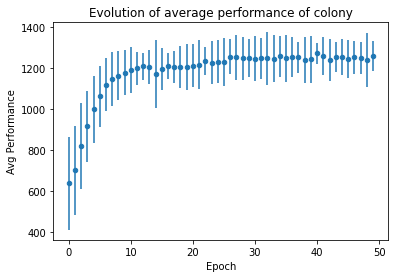

In [30]:
df_stat.plot(x ='Epoch', y='Avg Performance', kind = 'scatter',legend=False,yerr = "Std")


plt.title('Evolution of average performance of colony')
plt.show()

Text(0, 0.5, 'Throughput [MPoints/s]')

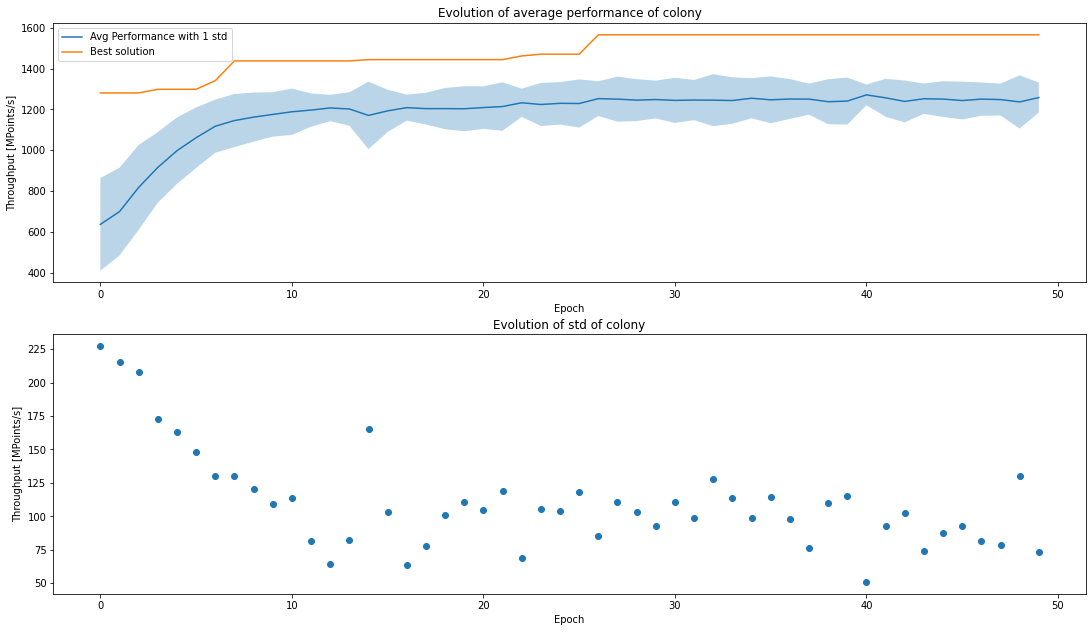

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(df_stat['Epoch'], df_stat['Avg Performance'])
ax1.plot(df_stat['Epoch'], df_stat['cummax'])
# ax1.scatter(df_stat['Epoch'], df_stat['min'], color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

ax1.fill_between(df_stat['Epoch'], df_stat['Avg Performance']-1*df_stat['Std'], df_stat['Avg Performance']+1*df_stat['Std'] ,alpha=0.3)
ax1.title.set_text('Evolution of average performance of colony')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Throughput [MPoints/s]')
ax1.legend(['Avg Performance with 1 std', 'Best solution'])

ax2.scatter(df_stat['Epoch'], df_stat['Std'])
ax2.title.set_text('Evolution of std of colony')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Throughput [MPoints/s]')




In [58]:
counter = 0
filename = "./Plots/Plot{}.png"

In [61]:
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = filename.format(counter)
fig.savefig(filename, dpi=100)
